# **DOCUMENTATION AND VISUALIZATION**

## DATA EXTRACTION AND PROCESSING



For this project, data was extracted from the Anime News Network website's "Anime Top 200 Best Rated (bayesian estimate)" page (https://www.animenewsnetwork.com/encyclopedia/ratings-anime.php?top50=best_bayesian&n=200). The BeautifulSoup web scraping API as well as the requests, pandas, and re libraries were used to collect data from the website in a Google Colab Python environment. The pandas dataframe was ultimately converted to a .csv file.

IMPORTED LIBRARIES

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

First, import the requests, BeautifulSoup, pandas, and re libraries to assist in web scraping.

DEFINE AND GET URL

In [ ]:
response = requests.get('https://www.animenewsnetwork.com/encyclopedia/ratings-anime.php?top50=best_bayesian&n=200')

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

Specify the address of the webpage containing the data and send a get request. Verify that the request is valid by checking if the status code is equal to 200. If it is valid, parse the website with BeautifulSoup.

LOCATE TABLE AND EXTRACT

In [ ]:
    tables = soup.find_all('table')

    table = tables[0]

    rows = table.find_all('tr')

Find the HTML table we want to scrape and extract all table rows, where each row indicates an individual anime entry.

INITIALIZE DATA STORAGE

In [ ]:
    rank = []
    title = []
    rating = []
    votes = []
    format_ = []

Initialize five empty lists. Each list corresponds to a category (column) of data. In this case, they are rank, title, rating, votes, and format.

REGULAR EXPRESSION FOR PARENTHESIS

In [ ]:
    regex = re.compile(r'\([^)]*\)')

We set up a regular expression pattern to identify and remove text enclosed within parentheses, which is common in anime titles. This is intended to help extract format data from the titles, which is not a pre-defined category on the website.

LOOP THROUGH ROWS AND EXTRACT

In [ ]:
    for row in rows[1:]:
        columns = row.find_all('td')

        if len(columns) >= 4:
            rank.append(columns[0].text.strip())
            title_text = columns[1].text.strip()

A for loop iterates through each table row (excluding the header row) and extracts data from the columns. The condition len(columns) >= 4 is used to ensure that the row has the required number of columns.

DETERMINE ANIME FORMAT

In [ ]:
            if "TV" in title_text:
                format_.append("TV")
            elif "movie" in title_text.lower():
                format_.append("Movie")
            elif "OAV" in title_text or "OVA" in title_text:
                format_.append("OAV")
            else:
                format_.append("Unknown")

 Categorize the anime format (TV, Movie, OAV, or Unknown) based wheter it is contained in the anime title text.

REMOVE PARENTHESIS FROM TITLES

In [ ]:
            title_text = re.sub(regex, '', title_text)
            title.append(title_text)

By referencing the regular expression we created earlier, remove parenthesis from the anime titles. The code is placed here so that anime format is determined before parenthesis are removed.

DATAFRAME CONSTRUCTION

In [ ]:
    data = {'Rank': rank, 'Title': title, 'Rating': rating, 'Votes': votes, 'Format': format_}
    df = pd.DataFrame(data)

The collected data is organized into a pandas DataFrame for further processing and analysis.

CLEAN UP DATAFRAME

In [ ]:
    df = df.iloc[1:]

    df.reset_index(drop=True, inplace=True)

Remove redundant title information. Additionally, reset the dataframe's index so that it starts from 0 for the data rows.

CONVERT DATAFRAME TO CSV FILE

In [ ]:
    df.to_csv('I310D_assignment1_data.csv', index=False)

    from google.colab import files
    files.download('I310D_assignment1_data.csv')

Save the dataframe as a .csv file without the index. Then, import files from google.colab and download the file in Colab. Finally, download the .csv file onto your local computer from the Colab environment.

ERROR HANDLING

In [ ]:
else:
    print(f"Failed to retrieve page, cannot access website. STATUS CODE: {response.status_code}")

If the event that the initial HTTP request fails and the status code != 200, display an error message.

## VISUALIZATION

DESCRIPTIVE STATISTICS

In [15]:
import pandas as pd

df = pd.read_csv('I310D_assignment1_data.csv')

selected_columns = ['Rating', 'Votes']
selected_data = df[selected_columns]

descriptive_stats = selected_data.describe()
print(descriptive_stats)
print()

range_votes = selected_data['Votes'].max() - selected_data['Votes'].min()
print(f"Range of Votes: {range_votes}")
print()

format_counts = df['Format'].value_counts()
print("Format Counts:\n", format_counts)

           Rating         Votes
count  200.000000    200.000000
mean     8.434200   2308.855000
std      0.187435   2619.587733
min      8.210000     63.000000
25%      8.290000    419.750000
50%      8.380000   1331.500000
75%      8.540000   3420.750000
max      9.070000  13525.000000

Range of Votes: 13462

Format Counts:
 TV         139
Movie       45
OAV         11
Unknown      5
Name: Format, dtype: int64


Load the data from the .csv file to generate descriptive statistics. Select only the relevant (numeric) columns to analyze, which in this case is rating and votes. Calculate the range of votes by subtracting the minimum value from the maximum. Then, count and display the frequency of anime format types.

After obtaining basic descriptive statistics, it becomes apparent that there exists a wide range of votes corresponding to each of the 200 anime titles. The maximum vote count is 13,525, while the minimum vote count is only 63 (range of votes = 13,462). Given this disparity, I investigated the correlation between the rating of a given top 200 anime and the amount of votes which determined its rating. More specifically, is vote count a significant predictor of rating?

BIVARIATE ANALYSIS

In [34]:
from scipy.stats import pearsonr

p = pearsonr(df['Votes'],df['Rating'])
print(p[0])

0.41911898888323423


Import pearsonr from scipy.stats to perform bivariate analysis. Set votes as the independent variable and rating as the dependent variable. Find r, which is p[0].

The Pearson's correlation coefficient (r = 0.419) reflects a moderate positive relationship between rating and vote count. This means that as an anime's amount of votes increases, there is a moderately strong propensity for its rating to increase linearly with it.

VOTES vs. RATING SCATTERPLOT

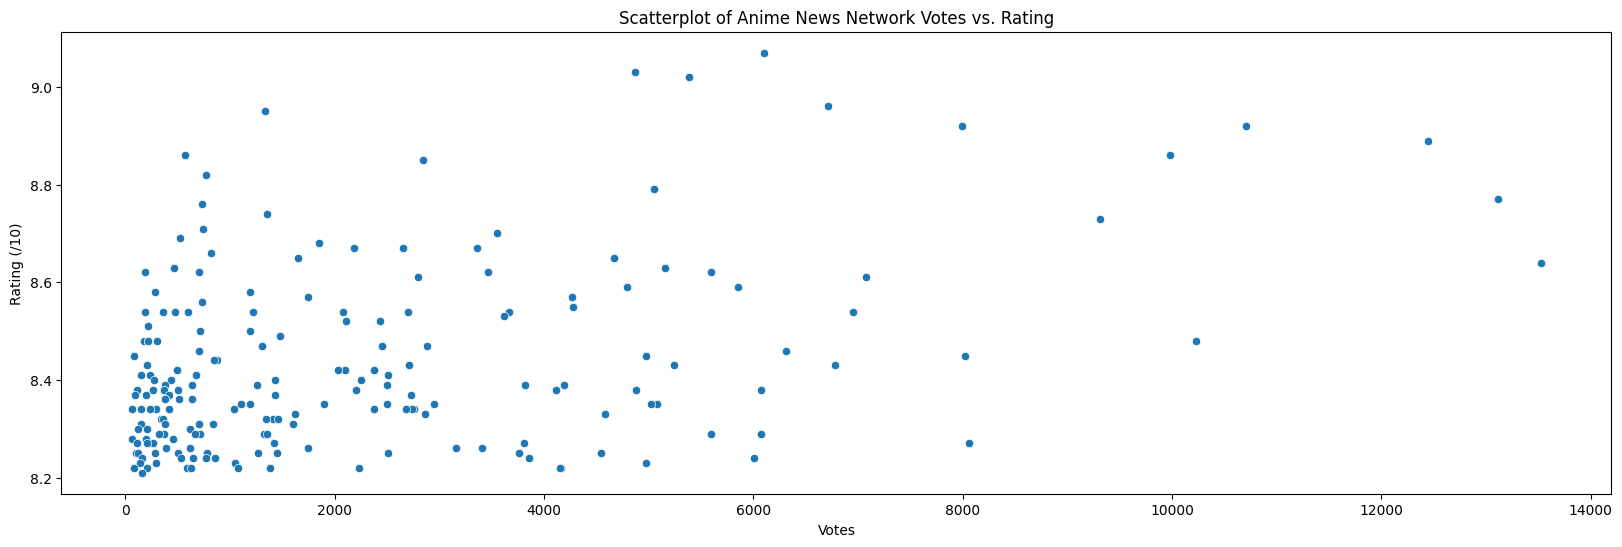

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Scatterplot of Anime News Network Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating (/10)')
plt.show()


Import seaborn and matplotlib.pyplot to create a scatterplot of the data.

From the scatterplot, moderate correlation between the variables can be made out from the plotted points, with the data trending linearly towards the positive direction (top right).

LINEAR REGRESSION



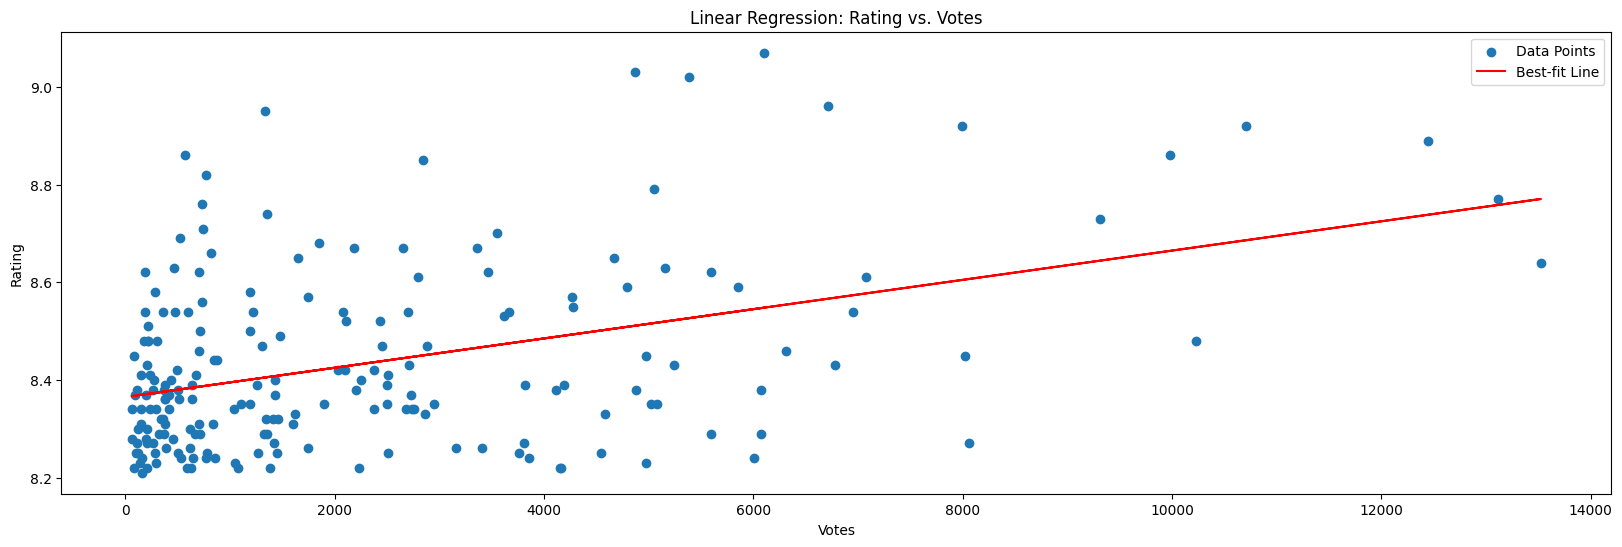

Slope (Coefficient): 2.9988583387035256e-05
Intercept: 8.364960709303928
R-squared (Coefficient of Determination): 0.1756607268425048
P-value: 6.539694261932379e-10


In [31]:
import numpy as np
import scipy.stats as stats

# Extract 'Votes' and 'Rating' as NumPy arrays
votes = df['Votes'].values
rating = df['Rating'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(votes, rating)

# Create the best-fit line
best_fit_line = slope * votes + intercept

# Plot the scatterplot and the best-fit line
plt.figure(figsize=(20, 6))
plt.scatter(votes, rating, label='Data Points')
plt.plot(votes, best_fit_line, color='red', label='Best-fit Line')
plt.title('Linear Regression: Rating vs. Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.legend()
plt.show()

# Display the linear regression results
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)
print("R-squared (Coefficient of Determination):", r_value ** 2)
print("P-value:", p_value)

Import numpy and stats libraries to assist in linear regression. Using numpy, extract votes and rating as arrays. Create the best-fit line equation and plot the scatterplot with it overlayed. Display linear regression results that were collected via the stats library.

ANALYSIS

Peforming linear regression and overlaying a best-fit linear model over the scatterplot, it becomes more apparent that there exists a positive and approximately linear relationship between vote count and anime rating.


The slope represents the change in the dependent variable (rating) for a one-unit change in the independent variable (votes). In this case, the slope is approximately 2.999e-05, which means that for every additional vote, the expected increase in rating is approximately 2.999e-05.


The R^2 value measures the goodness of fit of the regression model. It indicates the proportion of the variance in rating that can be explained by vote count. An R-squared value of approximately 0.176 means that around 17.6% of the variability in rating can be explained by votes, which explains the points' varying degrees of proximity to the regression line.


Finally, the p-value is used to assess the statistical significance of the relationship between votes and rating. In this case, the extremely low p-value of 6.540e-10 indicates a strong statistical significance, suggesting that there is some degree of correlation between vote count and rating.


In summary, the linear regression analysis suggests that there is a statistically significant, but relatively weak, positive correlation between the number of votes and the rating of the data. Although the model's R^2 value indicates that a small proportion of the variability in rating can be explained by the number of votes, the extremely low p-value implicates a significant relationship between the variables. Therefore, vote count predicts rating with a moderate positive correlation.

